In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import os
from PIL import Image
from keras.preprocessing import image
import pandas as pd 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

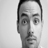

In [2]:
jpg_path= 'C:\\Users\\pc\\Desktop\\Drowsiness detection\\image.jpg'
im = Image.open(jpg_path).convert('LA')
newsize = (48, 48)
im1 = im.resize(newsize)
im1

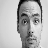

In [44]:
img = image.load_img("C:\\Users\\pc\\Desktop\\Drowsiness detection\\image.jpg",target_size = (48,48),color_mode = "grayscale")
img

In [45]:
width, height = im1.size

In [46]:
print(width, height)

48 48


In [7]:
pix_values=[]
classes = []
dirs = []
for dirname, _, filenames in os.walk('C:\\Users\\pc\\Desktop\\Drowsiness detection\\Drowsiness detection\\dataset_eye\\'):
    
    for filename in filenames:
        jpg_path = os.path.join(dirname, filename)
        emotion = jpg_path.split("\\")[-2]
        classes.append(emotion)
        dir = jpg_path.split("\\")[-3]
        dirs.append(dir)
        im = Image.open(jpg_path).convert('LA')
        
        newsize = (48, 48)
        im = im.resize(newsize)
        # grayscale
        pix_val=list(im.getdata())
        pix_val_flat = [x for sets in pix_val for x in sets]
        pix_values.append(pix_val_flat)      
#         pix_val_flat = [x for sets in pix_val for x in sets]

In [8]:
print("pix_val_flat: ",len(pix_values))
print("classes: ",len(classes))
print("dirs: ",len(dirs))

pix_val_flat:  1452
classes:  1452
dirs:  1452


In [9]:
# list of name, degree, score 
# dictionary of lists 
dict = {'pixels': pix_values, 'emotion': classes, 'Usage': dirs}  
df = pd.DataFrame(dict) 
print(df.head()) 

                                              pixels emotion Usage
0  [179, 255, 176, 255, 173, 255, 172, 255, 173, ...  Closed  test
1  [168, 255, 166, 255, 168, 255, 167, 255, 169, ...  Closed  test
2  [64, 255, 70, 255, 74, 255, 83, 255, 91, 255, ...  Closed  test
3  [183, 255, 183, 255, 181, 255, 182, 255, 178, ...  Closed  test
4  [228, 255, 229, 255, 230, 255, 231, 255, 233, ...  Closed  test


In [10]:
df["emotion"].value_counts()

Open      726
Closed    726
Name: emotion, dtype: int64

In [11]:
df.emotion [df.emotion  == 'Closed'] = 0
df.emotion [df.emotion  == 'Open'] = 1

In [12]:
 df["emotion"].value_counts()

1    726
0    726
Name: emotion, dtype: int64

In [13]:
 df["Usage"].value_counts()

train    1234
test      218
Name: Usage, dtype: int64

In [14]:
df.Usage [df.Usage  == 'train']="Training"

In [15]:
 df["Usage"].value_counts()

Training    1234
test         218
Name: Usage, dtype: int64

In [16]:
df.head()

,pixels,emotion,Usage
0,"[179, 255, 176, 255, 173, 255, 172, 255, 173, ...",0,test
1,"[168, 255, 166, 255, 168, 255, 167, 255, 169, ...",0,test
2,"[64, 255, 70, 255, 74, 255, 83, 255, 91, 255, ...",0,test
3,"[183, 255, 183, 255, 181, 255, 182, 255, 178, ...",0,test
4,"[228, 255, 229, 255, 230, 255, 231, 255, 233, ...",0,test


In [17]:

matrix = np.zeros((48, 48), dtype=np.uint8)

train_images = []
test_images = []
train_labels = []
test_labels = []

data_type = df["Usage"].value_counts()
data_type = data_type.to_dict()
data_type["Test"] = data_type["test"]
del data_type["test"]
print(data_type)



{'Training': 1234, 'Test': 218}


In [18]:
df["emotion"].value_counts()

1    726
0    726
Name: emotion, dtype: int64

In [20]:
df['Usage'][1447]

'Training'

In [21]:
def atoi(s):
  n = 0
  for i in s:
    n = n * 10 + ord(i) - ord("0")
  return n


for value in tqdm(range(len(df))):
  pixels = df['pixels'][value]
#   pixels_split = pixels.split()
  pixels_split = str(pixels).split(",")
    # phrase = re.sub(r"\'ll", " will", phrase)
  pixels_split =str(pixels_split).replace('[',"")
  pixels_split =str(pixels_split).replace(']',"")
  pixels_split =str(pixels_split).replace(' ',"")
  pixels_split = pixels_split.split(",")
    # pixels_split =list(pixels_split)
  pixels_split = [i.replace("'", '') for i in pixels_split]


  for values in range(2304):
    x_index = values // 48
    y_index = values % 48
    matrix[x_index][y_index] = atoi(pixels_split[values])

  if df['Usage'][value]=='Training':
    train_images.append(matrix)
    train_labels.append(df["emotion"][value])
  else:
    test_images.append(matrix)
    test_labels.append(df["emotion"][value])

train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 1452/1452 [00:24<00:00, 58.46it/s]


In [22]:
df_train = df[df['Usage']=="Training"]
df_test = df[df['Usage']=="test"]

In [23]:
df_train['emotion'].value_counts()

1    617
0    617
Name: emotion, dtype: int64

In [24]:
df_test['emotion'].value_counts()

1    109
0    109
Name: emotion, dtype: int64

In [25]:
from collections import Counter

print(Counter(train_labels))

Counter({0: 617, 1: 617})


In [26]:
from collections import Counter

print(Counter(test_labels))

Counter({0: 109, 1: 109})


In [28]:
print(len(train_images))
print(len(test_images))

1234
218


In [29]:
class conv:
    def __init__(self, number_of_filters, filter_dim):
        self.number_of_filters = number_of_filters
        self.filter_dim = filter_dim
        self.conv_filters = np.random.randn(number_of_filters, filter_dim, filter_dim)/(filter_dim * filter_dim)

    def image_region(self, image):
        height, width = image.shape
        self.image = image
        for j in range(height - self.filter_dim + 1):
            for k in range(width - self.filter_dim + 1):
                image_patch = image[ j : (j + self.filter_dim), k : (k + self.filter_dim)]
                yield image_patch, j, k

    def forward_propagation(self, image):
        height, width = image.shape
        conv_out = np.zeros((height - self.filter_dim + 1, width - self.filter_dim + 1, self.number_of_filters))
        for image_patch, i, j in self.image_region(image):
            conv_out[i, j] = np.sum(image_patch * self.conv_filters, axis = (1,2))
        return conv_out

    def back_propagation(self, dl_dout, learning_rate):
        dl_df_params = np.zeros(self.conv_filters.shape)
        for image_patch, i, j in self.image_region(self.image):
            for k in range(self.number_of_filters):
                dl_df_params[k] += image_patch*dl_dout[i, j, k]

            self.conv_filters -= learning_rate*dl_df_params
            return dl_df_params

In [30]:
class max_pool:
    def __init__(self, filter_dim):
        self.filter_dim = filter_dim

    def image_region(self, image):
        new_height = image.shape[0] // self.filter_dim
        new_width = image.shape[1] // self.filter_dim
        self.image = image

        for i in range(new_height):
            for j in range(new_width):
                image_patch = image[(i*self.filter_dim) :(i*self.filter_dim + self.filter_dim), (j*self.filter_dim) : (j*self.filter_dim + self.filter_dim)]
                yield image_patch, i, j

    def forward_propagation(self, image):
        height, width, number_of_filters = image.shape
        output = np.zeros((height // self.filter_dim, width // self.filter_dim, number_of_filters))

        for image_patch, i, j in self.image_region(image):
            output[i, j] = np.amax(image_patch, axis = (0,1))

        return output

    def back_propagation(self, dl_dout):
        dl_dmax_pool = np.zeros(self.image.shape)
        for image_patch, i, j in self.image_region(self.image):
            height, width, number_of_filters = image_patch.shape
            maximum_val = np.amax(image_patch, axis=(0,1))

            for i1 in range(height):
                for j1 in range(width):
                    for k1 in range(number_of_filters):
                        if image_patch[i1, j1, k1] == maximum_val[k1]:
                            dl_dmax_pool[i*self.filter_dim + i1, j*self.filter_dim + j1, k1] = dl_dout[i, j, k1]

            return dl_dmax_pool

In [31]:
class softmax:
    def __init__(self, input_node, softmax_node):
        self.weight = np.random.randn(input_node, softmax_node)/input_node
        self.bias = np.zeros(softmax_node)

    def forward_propagation(self, image):
        self.orig_im_shape = image.shape
        image_modified = image.flatten()
        self.modified_input = image_modified
        output_val = np.dot(image_modified, self.weight) + self.bias
        self.out = output_val
        exp_out = np.exp(output_val)

        return exp_out/np.sum(exp_out, axis = 0)

    def back_propagation(self, dl_dout, learning_rate):
        for i, grad in enumerate(dl_dout):
            if grad == 0:
                continue

            transformation_eq = np.exp(self.out)
            s_total = np.sum(transformation_eq)

            dy_dz = -transformation_eq[i]*transformation_eq / (s_total ** 2)
            dy_dz[i] = transformation_eq[i] * (s_total - transformation_eq[i]) / (s_total ** 2)

            dz_dw = self.modified_input
            dz_db = 1
            dz_d_inp = self.weight

            dl_dz = grad * dy_dz

            dl_dw = dz_dw[np.newaxis].T @ dl_dz[np.newaxis]
            dl_db = dl_dz * dz_db
            dl_d_inp = dz_d_inp @ dl_dz

        self.weight -= learning_rate * dl_dw
        self.bias -= learning_rate * dl_db

        return dl_d_inp.reshape(self.orig_im_shape)

In [32]:
convo = conv(10, 7)
pool = max_pool(4)
soft_max = softmax(10*10*10, 2)

In [33]:
def cnn_forward_prop(image, label):
    out_p = convo.forward_propagation((image / 255) - 0.5)
    out_p = pool.forward_propagation(out_p)
    out_p = soft_max.forward_propagation(out_p)

    cross_ent_loss = -np.log(out_p[label])
    accuracy_eval = 1 if np.argmax(out_p) == label else 0

    return out_p, cross_ent_loss, accuracy_eval

def training_cnn(image, label, learn_rate=0.001):

    out, loss, acc = cnn_forward_prop(image, label)

    gradient = np.zeros(7)
    gradient[label] = -1 / out[label]

    grad_back = soft_max.back_propagation(gradient, learn_rate)
    grad_back = pool.back_propagation(grad_back)
    grad_back = convo.back_propagation(grad_back, learn_rate)

    return loss, acc

In [34]:
for epoch1 in range(5):
    print('Epoch %d ----> ' %(epoch1 + 1))

    shuffle_data = np.random.permutation(len(train_images))
    train_images = train_images[shuffle_data]
    train_labels = train_labels[shuffle_data]

    loss = 0
    num_correct = 0

    for i, (im, label) in enumerate(zip(train_images, train_labels)):
        if i % 100 == 0:
            print("%d steps out of 100 steps: Average Loss %.3f and Accuracy: %d%%" %(i+1, loss / 100, num_correct))
            loss = 0
            num_correct = 0

        l1, accu = training_cnn(im, label)
        loss += l1
        num_correct += accu

print("Testing Phase")
loss = 0
num_correct = 0

for im, label in zip(test_images, test_labels):
    _, l1, accu = cnn_forward_prop(im, label)
    loss += l1
    num_correct += accu

num_tests = len(test_images)
print('Test Loss:', loss / num_tests)
print('Test Accuracy:', num_correct / num_tests)

Epoch 1 ----> 
1 steps out of 100 steps: Average Loss 0.000 and Accuracy: 0%
101 steps out of 100 steps: Average Loss 0.695 and Accuracy: 48%
201 steps out of 100 steps: Average Loss 0.689 and Accuracy: 59%
301 steps out of 100 steps: Average Loss 0.699 and Accuracy: 47%
401 steps out of 100 steps: Average Loss 0.696 and Accuracy: 44%
501 steps out of 100 steps: Average Loss 0.695 and Accuracy: 45%
601 steps out of 100 steps: Average Loss 0.695 and Accuracy: 48%
701 steps out of 100 steps: Average Loss 0.695 and Accuracy: 41%
801 steps out of 100 steps: Average Loss 0.695 and Accuracy: 48%
901 steps out of 100 steps: Average Loss 0.695 and Accuracy: 49%
1001 steps out of 100 steps: Average Loss 0.694 and Accuracy: 50%
1101 steps out of 100 steps: Average Loss 0.696 and Accuracy: 50%
1201 steps out of 100 steps: Average Loss 0.694 and Accuracy: 52%
Epoch 2 ----> 
1 steps out of 100 steps: Average Loss 0.000 and Accuracy: 0%
101 steps out of 100 steps: Average Loss 0.695 and Accuracy: 45

In [35]:
print(len(test_images))
print(len(test_labels))

218
218


(48, 48)
2304
[array([[ 79,  85,  88, ..., 132, 129, 131],
       [ 81,  86,  90, ..., 137, 141, 134],
       [ 81,  87,  90, ..., 140, 135, 138],
       ...,
       [103, 106, 108, ..., 115, 111, 105],
       [104, 110, 111, ..., 111, 111, 106],
       [105, 109, 111, ..., 113, 109, 106]], dtype=uint8), array([[ 79,  85,  88, ..., 132, 129, 131],
       [ 81,  86,  90, ..., 137, 141, 134],
       [ 81,  87,  90, ..., 140, 135, 138],
       ...,
       [103, 106, 108, ..., 115, 111, 105],
       [104, 110, 111, ..., 111, 111, 106],
       [105, 109, 111, ..., 113, 109, 106]], dtype=uint8)]
[0, 1]
{0: 0, 1: 1}
Open


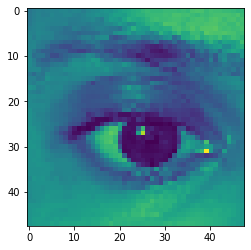

In [40]:
from keras.preprocessing import image
import numpy as np
img = image.load_img("C:\\Users\\pc\\Desktop\\Drowsiness detection\\Drowsiness detection\\dataset_eye\\train\\Open\\_0.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48)
print(img.size)
def predict(x):
    new_image = []
    loss_array = []
    accuracy_array = []
    data_dict = {}
    emotionss = {0: 'Closed', 1: 'Open'}
    for data in emotionss.keys():
        new_image.append(x[0])
    print(new_image)
    for im, label in zip(new_image, emotionss.keys()):
        loss = 0
        num_correct = 0
        _, l1, accu = cnn_forward_prop(im, label)
        loss += l1
        num_correct += accu
        loss_array.append(loss / 100)
        accuracy_array.append(num_correct)
        data_dict[label] = num_correct
        
        
    print(accuracy_array)
    print(data_dict)
    print(emotionss[max(data_dict, key=data_dict.get)])
    
predict(img)

(48, 48)
2304
[array([[120, 126, 114, ...,  87, 108, 122],
       [133, 139, 126, ...,  91,  76,  78],
       [153, 133, 117, ..., 121, 115, 106],
       ...,
       [147, 151, 160, ..., 171, 171, 171],
       [151, 153, 155, ..., 167, 170, 171],
       [155, 154, 150, ..., 173, 172, 171]], dtype=uint8), array([[120, 126, 114, ...,  87, 108, 122],
       [133, 139, 126, ...,  91,  76,  78],
       [153, 133, 117, ..., 121, 115, 106],
       ...,
       [147, 151, 160, ..., 171, 171, 171],
       [151, 153, 155, ..., 167, 170, 171],
       [155, 154, 150, ..., 173, 172, 171]], dtype=uint8)]
[1, 0]
{0: 1, 1: 0}
Closed


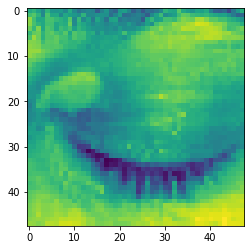

In [42]:
from keras.preprocessing import image
import numpy as np
img = image.load_img("C:\\Users\\pc\\Desktop\\Drowsiness detection\\Drowsiness detection\\dataset_eye\\train\\Closed\\_1.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48)
print(img.size)
def predict(x):
    new_image = []
    loss_array = []
    accuracy_array = []
    data_dict = {}
    emotionss = {0: 'Closed', 1: 'Open'}
    for data in emotionss.keys():
        new_image.append(x[0])
    print(new_image)
    for im, label in zip(new_image, emotionss.keys()):
        loss = 0
        num_correct = 0
        _, l1, accu = cnn_forward_prop(im, label)
        loss += l1
        num_correct += accu
        loss_array.append(loss / 100)
        accuracy_array.append(num_correct)
        data_dict[label] = num_correct
        
        
    print(accuracy_array)
    print(data_dict)
    print(emotionss[max(data_dict, key=data_dict.get)])
    
predict(img)

# DONE